In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "xxxxxxxxxxx"
os.environ['KAGGLE_KEY'] = "xxxxxxxxxxx"

In [ ]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

the-simpsons-characters-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir thesimp
!unzip -qq the-simpsons-characters-dataset.zip -d thesimp
!ls thesimp

annotation.txt		     kaggle_simpson_testset  simpsons_dataset
characters_illustration.png  number_pic_char.csv     weights.best.hdf5


In [ ]:
!ls thesimp/simpsons_dataset/simpsons_dataset/

abraham_grampa_simpson	  groundskeeper_willie	ned_flanders
agnes_skinner		  homer_simpson		nelson_muntz
apu_nahasapeemapetilon	  kent_brockman		otto_mann
barney_gumble		  krusty_the_clown	patty_bouvier
bart_simpson		  lenny_leonard		principal_skinner
carl_carlson		  lionel_hutz		professor_john_frink
charles_montgomery_burns  lisa_simpson		rainier_wolfcastle
chief_wiggum		  maggie_simpson	ralph_wiggum
cletus_spuckler		  marge_simpson		selma_bouvier
comic_book_guy		  martin_prince		sideshow_bob
disco_stu		  mayor_quimby		sideshow_mel
edna_krabappel		  milhouse_van_houten	snake_jailbird
fat_tony		  miss_hoover		troy_mcclure
gil			  moe_szyslak		waylon_smithers


In [ ]:
import os

thesimp = os.path.join('/content/thesimp/simpsons_dataset/simpsons_dataset')

print(os.listdir(thesimp))

['lisa_simpson', 'cletus_spuckler', 'kent_brockman', 'ned_flanders', 'ralph_wiggum', 'maggie_simpson', 'bart_simpson', 'gil', 'edna_krabappel', 'carl_carlson', 'fat_tony', 'comic_book_guy', 'martin_prince', 'selma_bouvier', 'sideshow_bob', 'homer_simpson', 'lenny_leonard', 'moe_szyslak', 'groundskeeper_willie', 'krusty_the_clown', 'marge_simpson', 'milhouse_van_houten', 'rainier_wolfcastle', 'lionel_hutz', 'patty_bouvier', 'waylon_smithers', 'abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'nelson_muntz', 'disco_stu', 'barney_gumble', 'troy_mcclure', 'otto_mann', 'principal_skinner', 'agnes_skinner', 'chief_wiggum', 'professor_john_frink', 'miss_hoover', 'mayor_quimby', 'snake_jailbird', 'charles_montgomery_burns', 'sideshow_mel']


In [ ]:
import shutil

ignore_simp = ['sideshow_mel', 'snake_jailbird', 'mayor_quimby', 'miss_hoover', 'professor_john_frink', 'otto_mann', 'troy_mcclure', 'nelson_muntz', 'apu_nahasapeemapetilon', 'waylon_smithers', 'rainier_wolfcastle', 'sideshow_bob', 'selma_bouvier', 'martin_prince', 'maggie_simpson', 'ralph_wiggum', 'agnes_skinner', 'barney_gumble', 'carl_carlson', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'kent_brockman', 'lenny_leonard','lionel_hutz' ]

for x in ignore_simp:
  path = os.path.join(thesimp, x)
  shutil.rmtree(path)

In [ ]:
list_thesimp = os.listdir(thesimp)
print(list_thesimp)

['lisa_simpson', 'ned_flanders', 'bart_simpson', 'homer_simpson', 'moe_szyslak', 'krusty_the_clown', 'marge_simpson', 'milhouse_van_houten', 'patty_bouvier', 'abraham_grampa_simpson', 'principal_skinner', 'chief_wiggum', 'charles_montgomery_burns']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [ ]:
data_train = train_datagen.flow_from_directory(
    thesimp,
    target_size=(150, 150),
    batch_size=256,
    class_mode='categorical',
    subset='training')

data_val = train_datagen.flow_from_directory(
    thesimp, 
    target_size=(150, 150),
    batch_size=256,
    class_mode='categorical',
    subset='validation')

Found 12632 images belonging to 13 classes.
Found 3150 images belonging to 13 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(13, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nUntuk Epoch', epoch, '\nAkurasi mencapai = %2.2f%%' %(logs['accuracy']*100), 'training telah berhenti')
            self.model.stop_training = True

In [ ]:
history = model.fit(
    data_train,
    steps_per_epoch = 40,
    epochs = 50,
    validation_data = data_val,
    validation_steps = 5,
    verbose = 2,
    callbacks = [my_callbacks()]
)

Epoch 1/50
40/40 - 115s - loss: 2.3604 - accuracy: 0.1749 - val_loss: 2.2525 - val_accuracy: 0.2273
Epoch 2/50
40/40 - 79s - loss: 1.9979 - accuracy: 0.3361 - val_loss: 1.9009 - val_accuracy: 0.3789
Epoch 3/50
40/40 - 78s - loss: 1.7041 - accuracy: 0.4490 - val_loss: 1.7086 - val_accuracy: 0.4414
Epoch 4/50
40/40 - 80s - loss: 1.4840 - accuracy: 0.5222 - val_loss: 1.5970 - val_accuracy: 0.4789
Epoch 5/50
40/40 - 79s - loss: 1.2843 - accuracy: 0.5870 - val_loss: 1.4391 - val_accuracy: 0.5625
Epoch 6/50
40/40 - 79s - loss: 1.1440 - accuracy: 0.6232 - val_loss: 1.2830 - val_accuracy: 0.6062
Epoch 7/50
40/40 - 79s - loss: 1.0106 - accuracy: 0.6738 - val_loss: 1.0981 - val_accuracy: 0.6602
Epoch 8/50
40/40 - 82s - loss: 0.9176 - accuracy: 0.7093 - val_loss: 1.0907 - val_accuracy: 0.6648
Epoch 9/50
40/40 - 81s - loss: 0.8481 - accuracy: 0.7264 - val_loss: 0.9587 - val_accuracy: 0.7070
Epoch 10/50
40/40 - 80s - loss: 0.7764 - accuracy: 0.7536 - val_loss: 1.0022 - val_accuracy: 0.6891
Epoch 11

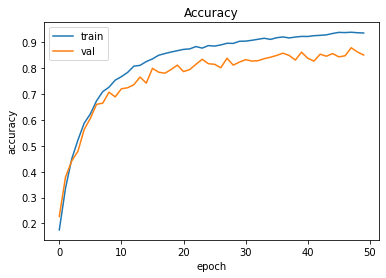

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

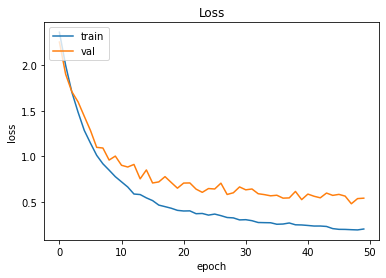

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpkz3mzv2y/assets
